# **Linear Regression: Predicting Boston House Prices**

---


### **Objective**
Predict house prices (`MEDV`) based on one or two features using **Linear Regression** in Python with **scikit-learn**, visualizing results with **matplotlib**.


### **Dataset**
Boston Housing Dataset (506 rows, 14 columns) sourced from Google Drive.

**Features selected:**
- `RM` – Average number of rooms per dwelling
- `LSTAT` – % lower status of the population

**Target:** `MEDV` – Median value of owner-occupied homes in $1000's


### **Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10,6)
plt.rcParams['axes.facecolor'] = '#e0f7f7'
plt.rcParams['axes.edgecolor'] = '#20B2AA'
plt.rcParams['axes.labelcolor'] = '#20B2AA'
plt.rcParams['xtick.color'] = '#20B2AA'
plt.rcParams['ytick.color'] = '#20B2AA'
plt.rcParams['text.color'] = '#20B2AA'

### **Load Dataset from Google Drive & Handle Missing Values**

In [2]:
file_id = '1qn4wCofmMkxubrkmUkLW5GYiDmXqodP2'
url = f'https://drive.google.com/uc?id={file_id}'
data = pd.read_csv(url)

# Impute missing values in features
imputer_X = SimpleImputer(strategy='mean')
X = imputer_X.fit_transform(data[['RM','LSTAT']])

# Impute missing values in target
imputer_y = SimpleImputer(strategy='mean')
y = imputer_y.fit_transform(data[['MEDV']]).ravel()  # flatten to 1D

### **Split Data: Train & Test**

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### **Train Linear Regression Model**

In [4]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

### **Model Evaluation**

In [5]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R² Score: {r2:.2f}')

Mean Squared Error: 31.54
R² Score: 0.57


### **Visualize Predictions vs Actual**

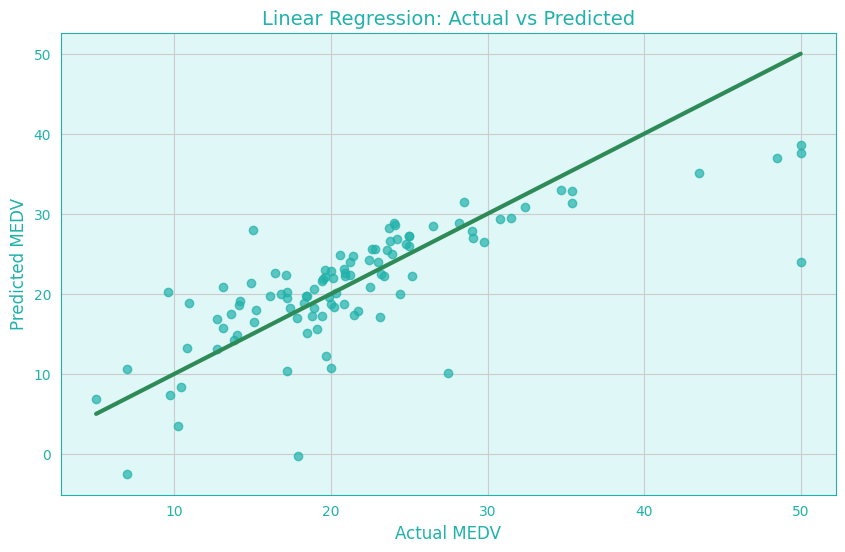

In [6]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, color='#20B2AA', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='#2E8B57', linewidth=3)
plt.xlabel('Actual MEDV', fontsize=12)
plt.ylabel('Predicted MEDV', fontsize=12)
plt.title('Linear Regression: Actual vs Predicted', fontsize=14, color='#20B2AA')
plt.show()

### **Feature Coefficients**

In [7]:
coef_df = pd.DataFrame({'Feature': ['RM','LSTAT'], 'Coefficient': model.coef_})
coef_df.style.set_table_styles(
    [{'selector': 'th', 'props': [('background-color', '#20B2AA'), ('color', 'white')]},
     {'selector': 'td', 'props': [('background-color', '#e0f7f7')]}]
)

,Feature,Coefficient
0,RM,5.780526
1,LSTAT,-0.607888


### **Scatter Plots of Features vs Target**

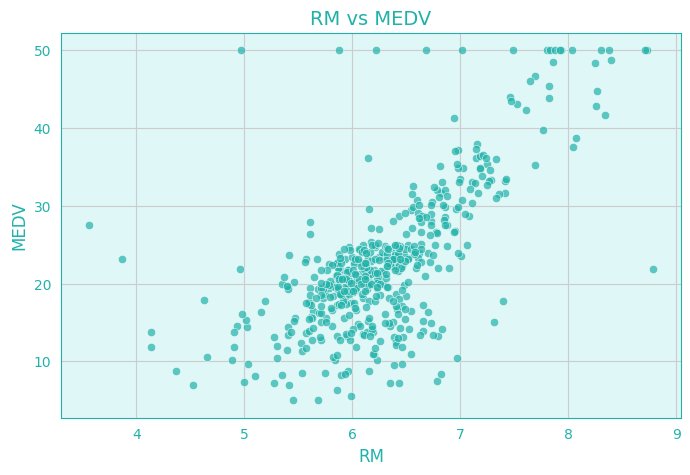

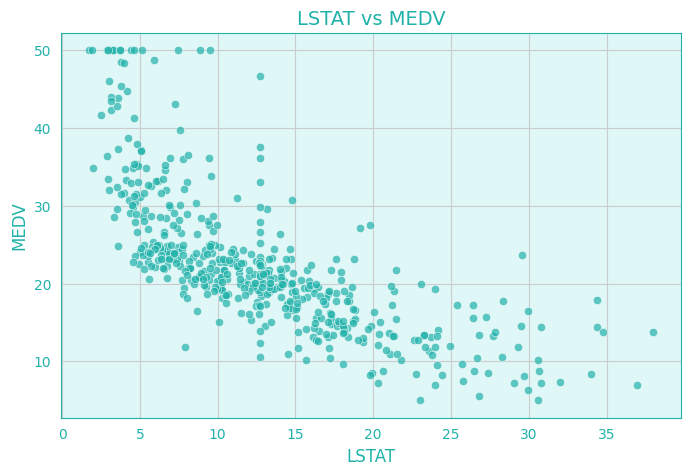

In [8]:
for i, feature in enumerate(['RM','LSTAT']):
    plt.figure(figsize=(8,5))
    sns.scatterplot(x=X[:,i], y=y, color='#20B2AA', alpha=0.7)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('MEDV', fontsize=12)
    plt.title(f'{feature} vs MEDV', fontsize=14, color='#20B2AA')
    plt.show()

###  **Summary**
- Linear Regression trained using `RM` & `LSTAT`.
- R² and MSE indicate model performance.
- Plots show **actual vs predicted values** and **feature correlations**.
- Notebook ready for **submission** with themed styling.